In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import numpy as np
import itertools


In [ ]:
train_data = pd.read_excel('/content/drive/MyDrive/FakeNewsData/fakeNewsData/Constraint_English_Train.xlsx')


In [ ]:
test_data = pd.read_excel('/content/drive/MyDrive/FakeNewsData/fakeNewsData/Constraint_English_Test.xlsx')

In [ ]:
val_data = pd.read_excel('/content/drive/MyDrive/FakeNewsData/fakeNewsData/Constraint_English_Val.xlsx')


In [ ]:
import re
import string

In [ ]:
#Removing punctuations and special characters
def remove_special_charac_and_punctuations(text) :
  # define the pattern to keep
  pat = r'[^a-zA-z0-9\'\s]' 
  txt = re.sub(pat, '', text)
  txt = ''.join([c for c in txt if c not in string.punctuation])
  return  txt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Remove stop words
import nltk as nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopword_list = nltk.corpus.stopwords.words('english')

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
#Will not be using this for buildign base model
def remove_stopwords(text):
    # convert sentence into token of words
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    # check in lowercase 
    t = [token for token in tokens if token.lower() not in stopword_list]
    text = ' '.join(t)    
    return text

In [ ]:
train_data["cleaned"]=  train_data['tweet'].apply(remove_special_charac_and_punctuations)

In [ ]:
val_data['cleaned'] = val_data['tweet'].apply(remove_special_charac_and_punctuations)

In [ ]:
#Converting text to lower case
train_data["cleaned"] = train_data["cleaned"].str.lower()

In [ ]:
val_data["cleaned"] = val_data["cleaned"].str.lower()

In [ ]:
ctf_data = pd.read_csv("/content/drive/MyDrive/FakeNewsData/fakeNewsData/new_ctf_data.txt",sep = '\t',header = None)

In [ ]:
ctf_data.columns = ['label','tweet']

In [ ]:
ctf_data['cleaned'] = ctf_data['tweet'].apply(remove_special_charac_and_punctuations)

In [ ]:
ctf_data['cleaned'].head(5)

0                         media briefing on covid with
1      new johnson amp johnson says its covid vacci...
2              i hope a lot of people read this thread
3      what if coronavirus part of that lysol can t...
4      thailand claiming they have good result of m...
Name: cleaned, dtype: object

# Keyword Extractor

In [ ]:
!pip install yake

     |████████████████████████████████| 60 kB 2.6 MB/s 
     |████████████████████████████████| 134 kB 8.6 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.8.8-cp37-cp37m-linux_x86_64.whl size=73206 sha256=6291c004750974b1098ecffb2a59f697bc4191fe386d0a290b71a6ae5427a18d
  Stored in directory: /root/.cache/pip/wheels/82/aa/f4/716387e1f167cbbf911488aa056138152f4d8699c9c9b43ea8
  Created wheel for segtok: filename=segtok-1.5.10-py3-none-any.whl size=25030 sha256=1d22f9ca6efc566f3692a5aa0b192847c2fd2b2b91e3f9a32ad01b5517b80873
  Stored in directory: /root/.cache/pip/wheels/67/b7/d0/a121106e61339eee5ed083bc230b1c8dc422c49a5a28c2addd
Successfully built jellyfish segtok


In [ ]:
import yake

In [ ]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 
deduplication_threshold = 0.5
numOfKeywords = 10

SyntaxError: ignored

In [ ]:
text = """spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. The library is published under the MIT license and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""

In [ ]:
text2 ="bollywood actor aamir kahan has anonymously donated Rs 15000 to people living in a slum."

In [ ]:
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text2)

In [ ]:
for kw in keywords:
    print(kw)

('bollywood actor', 0.04940384002065631)
('actor aamir', 0.09700399286574239)
('aamir kahan', 0.09700399286574239)
('anonymously donated', 0.09700399286574239)
('people living', 0.09700399286574239)
('slum', 0.15831692877998726)
('actor', 0.29736558256021506)
('aamir', 0.29736558256021506)
('kahan', 0.29736558256021506)
('donated', 0.29736558256021506)


In [ ]:
# kw_list = [i[0] for i in keywords]

In [ ]:
train_data.iloc[406,:]['keywords']

In [ ]:
kw_list = train_data.iloc[406,:]['keywords']

In [ ]:
kw_list

['aamir',
 'aamir khan',
 'actor',
 'actor aamir',
 'anonymously donated',
 'bollywoof actor',
 'donated',
 'khan',
 'people living',
 'slum']

In [ ]:
def keyword_extractor(x) :
  custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
  keywords = custom_kw_extractor.extract_keywords(x)
  kw_list = [i[0] for i in keywords]
  return kw_list

In [ ]:
train_data['keywords'] = train_data['cleaned'].apply(lambda x  : keyword_extractor(x))

In [ ]:
train_data['keywords'].head(5)

In [ ]:
def listToString(s):    
    str1 = " "    
    return (str1.join(s))

In [ ]:
train_data['keyword_string'] = train_data['keywords'].apply(lambda x : listToString(x))

In [ ]:
train_data['keyword_string'].head(5)

0    people today toll stands death counts reports ...
1    states reported small rise tuesday southern so...
2    coronavirus nashville politically correct plas...
3    covid testing staysafe indiawillwin testing la...
4    million today populous states generate large l...
Name: keyword_string, dtype: object

In [ ]:
myDict = {key: [0,0] for key in kw_list}

In [ ]:
myDict

{'aamir': [0, 0],
 'aamir khan': [0, 0],
 'actor': [0, 0],
 'actor aamir': [0, 0],
 'anonymously donated': [0, 0],
 'bollywoof actor': [0, 0],
 'donated': [0, 0],
 'khan': [0, 0],
 'people living': [0, 0],
 'slum': [0, 0]}

In [ ]:
def label_counter(x,my_dict):
 for index,row in x.iterrows() :
   label = row['label']
   tweet = row['cleaned']
   for k in my_dict.keys() :
     if k in tweet :
       if label == "real" :
         my_dict[k][0] =  my_dict[k][0] + 1
       else :
         my_dict[k][1] =  my_dict[k][1] + 1
 return my_dict

In [ ]:
dict1_counter = label_counter(train_data,myDict)

In [ ]:
def total_label_counter(my_dict) :
  real_ct = 0
  fake_ct = 0
  for key in my_dict.keys() :
     real_ct = real_ct + my_dict[key][0]
     fake_ct = fake_ct + my_dict[key][1]
  return (real_ct,fake_ct)



In [ ]:
res = total_label_counter(myDict)

In [ ]:
res

(55, 111)

In [ ]:
#second example   plastic bag

In [ ]:
train_data.iloc[503,]['keywords']

['elderly woman',
 'woman struggling',
 'breathe lying',
 'hospital morgue',
 'plastic bag',
 'bag',
 'video',
 'relatives',
 'woman',
 'lying']

In [ ]:
kw_list2 = train_data.iloc[503,]['keywords']

In [ ]:
myDict2 = {key: [0,0] for key in kw_list2}

In [ ]:
dict2_counter = label_counter(train_data,myDict2)

In [ ]:
dict2_counter

{'bag': [0, 16],
 'breathe lying': [0, 1],
 'elderly woman': [0, 1],
 'hospital morgue': [0, 1],
 'lying': [18, 26],
 'plastic bag': [0, 3],
 'relatives': [1, 3],
 'video': [9, 189],
 'woman': [17, 34],
 'woman struggling': [0, 1]}

In [ ]:
total_label_counter(dict2_counter)

(45, 275)

In [ ]:
dict1_counter

{'aamir': [0, 5],
 'aamir khan': [0, 5],
 'actor': [15, 14],
 'actor aamir': [0, 3],
 'anonymously donated': [0, 1],
 'bollywoof actor': [0, 1],
 'donated': [0, 5],
 'khan': [7, 17],
 'people living': [3, 4],
 'slum': [3, 1]}

In [ ]:
total_label_counter(dict1_counter)

(28, 56)

In [ ]:
kw_list3 = train_data.iloc[2878,]['keywords']
myDict3 = {key: [0,0] for key in kw_list3}

In [ ]:
dict3_counter = label_counter(train_data,myDict3)
dict3_counter

{'breaking lockdown': [0, 1],
 'gandhi': [2, 10],
 'gandhi priyanka': [0, 0],
 'lockdown regulations': [0, 1],
 'meerut road': [0, 1],
 'mohoddin pur': [0, 1],
 'muradnagar nahar': [0, 1],
 'nahar': [0, 1],
 'rahul gandhi': [0, 3],
 'visit friends': [0, 1]}

In [ ]:
total_label_counter(dict3_counter)

(2, 20)

In [ ]:
kw_list4 = train_data.iloc[45,]['keywords']
myDict4 = {key: [0,0] for key in kw_list4}

In [ ]:
myDict4

{'cases': [0, 0],
 'consecutive days': [0, 0],
 'days': [0, 0],
 'exceeded': [0, 0],
 'india': [0, 0],
 'indiafightscorona': [0, 0],
 'recoveries': [0, 0]}

In [ ]:
dict4_counter = label_counter(train_data,myDict4)
dict4_counter

{'cases': [976, 131],
 'consecutive days': [3, 0],
 'days': [224, 70],
 'exceeded': [12, 0],
 'india': [563, 255],
 'indiafightscorona': [319, 3],
 'recoveries': [99, 4]}

In [ ]:
total_label_counter(dict4_counter)

(2196, 463)

In [ ]:
kw_list5 = train_data.iloc[70,]['keywords']
myDict5 = {key: [0,0] for key in kw_list5}

In [ ]:
myDict5

{'dyk': [0, 0],
 'dyk handwashing': [0, 0],
 'handwashing remains': [0, 0],
 'prevent': [0, 0],
 'remains': [0, 0],
 'spread': [0, 0],
 'surgeongeneral dyk': [0, 0],
 'things': [0, 0],
 'viruses': [0, 0]}

In [ ]:
dict5_counter = label_counter(train_data,myDict5)
dict5_counter

{'dyk': [9, 2],
 'dyk handwashing': [1, 0],
 'handwashing remains': [1, 0],
 'prevent': [83, 70],
 'remains': [89, 2],
 'spread': [192, 79],
 'surgeongeneral dyk': [2, 0],
 'things': [10, 11],
 'viruses': [5, 26]}

In [ ]:
total_label_counter(dict5_counter)

(392, 190)

In [ ]:
kw_list6 = train_data.iloc[29,]['keywords']
myDict6 = {key: [0,0] for key in kw_list6}

In [ ]:
myDict6

{'coronavirus': [0, 0],
 'effective sanitizers': [0, 0],
 'found vaporized': [0, 0],
 'hydrogen peroxide': [0, 0],
 'masks nih': [0, 0],
 'nih': [0, 0],
 'nih found': [0, 0],
 'reusing': [0, 0],
 'sanitizers': [0, 0],
 'vaporized hydrogen': [0, 0]}

In [ ]:
dict6_counter = label_counter(train_data,myDict6)
dict6_counter

{'coronavirus': [465, 1235],
 'effective sanitizers': [1, 0],
 'found vaporized': [1, 0],
 'hydrogen peroxide': [1, 0],
 'masks nih': [1, 0],
 'nih': [7, 8],
 'nih found': [1, 0],
 'reusing': [1, 0],
 'sanitizers': [1, 3],
 'vaporized hydrogen': [1, 0]}

In [ ]:
total_label_counter(dict6_counter)

(480, 1246)

#Model building

In [ ]:
nltk.download('stopwords')

In [ ]:
stops = set(stopwords.words("english"))
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [ ]:
train = pd.read_excel('/content/drive/MyDrive/FakeNewsData/fakeNewsData/Constraint_English_Train.xlsx')
val = pd.read_excel('/content/drive/MyDrive/FakeNewsData/fakeNewsData/Constraint_English_Val.xlsx')

In [ ]:
train['cleaned'] = train['tweet'].map(lambda x: cleantext(x))
val['cleaned'] = val['tweet'].map(lambda x: cleantext(x))

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))
    
    

In [ ]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
fit = pipeline.fit(train['cleaned'],train['label'])

In [ ]:
val['label']

0       fake
1       fake
2       fake
3       fake
4       real
        ... 
2135    fake
2136    real
2137    fake
2138    fake
2139    real
Name: label, Length: 2140, dtype: object

[[ 963   57]
 [  83 1037]]
              precision    recall  f1-score   support

        fake       0.92      0.94      0.93      1020
        real       0.95      0.93      0.94      1120

    accuracy                           0.93      2140
   macro avg       0.93      0.94      0.93      2140
weighted avg       0.93      0.93      0.93      2140

Accuracy :  0.9345794392523364
Precison :  0.9348008619335585
Recall :  0.9345794392523364
F1 :  0.9345519215989282


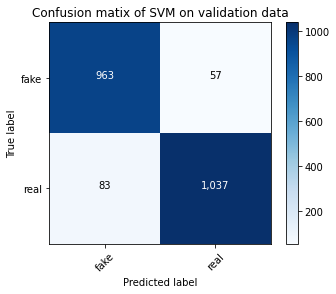

In [ ]:
pred=pipeline.predict(val['cleaned'])
print_metrices(pred,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on validation data')


## Validating on new CTF data set (Covariance shift)

In [ ]:
ctf_data['label'] = ctf_data['label'].astype("category")

In [ ]:
ctf_data['label'].value_counts()

1    387
0    387
Name: label, dtype: int64

In [ ]:
ctf_data['label']

0      0
1      1
2      0
3      1
4      1
      ..
769    0
770    1
771    1
772    1
773    0
Name: label, Length: 774, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
ctf_data['label'] = ctf_data['label'].map({0 : "real",1:"fake"})

[[359  28]
 [255 132]]
              precision    recall  f1-score   support

        fake       0.58      0.93      0.72       387
        real       0.82      0.34      0.48       387

    accuracy                           0.63       774
   macro avg       0.70      0.63      0.60       774
weighted avg       0.70      0.63      0.60       774

Accuracy :  0.6343669250645995
Precison :  0.80639518191348
Recall :  0.6343669250645995
F1 :  0.6687762209211128


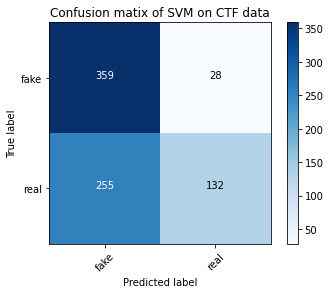

In [ ]:
pred_ctf=pipeline.predict(ctf_data['cleaned'])
print_metrices(pred_ctf,ctf_data['label'])
plot_confusion_matrix(confusion_matrix(ctf_data['label'],pred_ctf),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on CTF data')


##Training with embeddings

In [ ]:
import tensorflow_hub as hub

In [ ]:
!pip3 install tensorflow_text

     |████████████████████████████████| 4.4 MB 4.3 MB/s 


In [ ]:
import tensorflow_text 

In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")

In [ ]:
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p

In [ ]:
p.set_options(p.OPT.URL, p.OPT.MENTION)

In [ ]:
punctuations = string.punctuation

In [ ]:
def clean(text):
    text = p.clean(text)
    text = re.sub(r'\W+', ' ', text)  # remove non-alphanumeric characters
    # replace numbers with the word 'number'
    text = re.sub(r"\d+", "number", text)
    # don't consider sentenced with less than 3 words (i.e. assumed noise)
    if len(text.strip().split()) < 3:
        return None
    text = text.lower()  # lower case everything
    
    return text.strip() # remove redundant spaces

In [ ]:
train_df = pd.read_excel('/content/drive/MyDrive/FakeNewsData/fakeNewsData/Constraint_English_Train.xlsx')


In [ ]:
val_df = pd.read_excel('/content/drive/MyDrive/FakeNewsData/fakeNewsData/Constraint_English_Val.xlsx')


In [ ]:
train_df = train_df.assign(clean_text=train_df.tweet.apply(clean)).dropna()

In [ ]:
val_df = val_df.assign(clean_text=val_df.tweet.apply(clean)).dropna()

In [ ]:
ctf_data = ctf_data.assign(clean_text=ctf_data.tweet.apply(clean)).dropna()

In [ ]:
train_df['clean_text'][0]

'the cdc currently reports number deaths in general the discrepancies in death counts between different sources are small and explicable the death toll stands at roughly number people today'

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
train_df = train_df.assign(final_text=train_df['clean_text'].apply(remove_stopwords))

In [ ]:
train_df['final_text'][0]

'cdc currently reports number deaths general discrepancies death counts different sources small explicable death toll stands roughly number people today'

In [ ]:
val_df = val_df.assign(final_text=val_df['clean_text'].apply(remove_stopwords))

In [ ]:
ctf_data = ctf_data.assign(final_text=ctf_data['clean_text'].apply(remove_stopwords))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
msg_train, msg_test, y_train, y_test = train_test_split(train_df.final_text, train_df.label,)

In [ ]:
msg_test.shape

(1605,)

In [ ]:
X_test = embed(msg_test)
X_test.shape

TensorShape([1605, 512])

In [ ]:
X_train = embed(msg_train)

In [ ]:
X_train.shape

TensorShape([4814, 512])

In [ ]:
# #if size is high ang getting memeory issue we can use somethin glike this 
# splits = np.array_split(msg_train, 5)
# l = list()
# for split in splits:
#     l.append(embed(split))
# X_train = tf.concat(l, axis=0)
# del l
# X_train.shape

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
class_weight = compute_class_weight(
    class_weight='balanced', classes=["real","fake"], y=y_train
)

In [ ]:
class_weight

array([0.95858224, 1.04515849])

In [ ]:
# clf = SVC(class_weight={"real":class_weight[0], "fake":class_weight[1]})

In [ ]:
clf = SVC()

In [ ]:
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(np.array(X_test))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fake       0.90      0.92      0.91       757
        real       0.92      0.91      0.92       848

    accuracy                           0.91      1605
   macro avg       0.91      0.91      0.91      1605
weighted avg       0.91      0.91      0.91      1605



In [ ]:
#testing on validation data
val_data = embed(val_df['final_text'])

In [ ]:
val_pred = clf.predict(np.array(val_data))

In [ ]:
val_pred

array(['fake', 'fake', 'fake', ..., 'fake', 'fake', 'real'], dtype=object)

In [ ]:
print(classification_report(val_pred, val_df['label']))

              precision    recall  f1-score   support

        fake       0.92      0.89      0.90      1045
        real       0.90      0.92      0.91      1095

    accuracy                           0.91      2140
   macro avg       0.91      0.91      0.91      2140
weighted avg       0.91      0.91      0.91      2140



## Checking robustness of embedding technique  with DA techniques 

### Synonym replacement

In [ ]:
val_df['augmented'] = val_df['final_text'].apply(lambda x : synonym_replacement(x))

In [ ]:
val_df['augmented'][0]

'formosan change islamism actualise islamic bear upon coronavirus covdnumber area'

In [ ]:
val_df['final_text'][0]

'chinese converting islam realising muslim affected coronavirus covdnumber country'

In [ ]:
#testing on validation data
val_embed = embed(val_df['augmented'])

In [ ]:
val_embed.shape

TensorShape([2140, 512])

In [ ]:
val_pred_embed = clf.predict(np.array(val_embed))

In [ ]:
val_pred_embed

array(['fake', 'real', 'fake', ..., 'fake', 'fake', 'real'], dtype=object)

[[922  98]
 [232 888]]
              precision    recall  f1-score   support

        fake       0.80      0.90      0.85      1020
        real       0.90      0.79      0.84      1120

    accuracy                           0.85      2140
   macro avg       0.85      0.85      0.85      2140
weighted avg       0.85      0.85      0.85      2140

Accuracy :  0.8457943925233645
Precison :  0.8527488939501036
Recall :  0.8457943925233645
F1 :  0.845947842199207


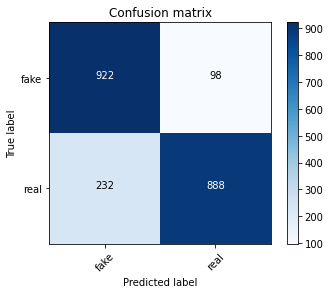

In [ ]:

pred_embed_aug= clf.predict(np.array(val_embed))
print_metrices(pred_embed_aug,val_df['label'])
plot_confusion_matrix(confusion_matrix(val_df['label'],pred_embed_aug),target_names=['fake','real'], normalize = False)


### Keyword synonym replacement

In [ ]:
val_df['keywords'] = val_df['final_text'].apply(lambda x : keyword_extractor(x))

In [ ]:
def synonym_replacement(val): 
  cleaned_words = list(val['final_text'])
  keywords = list(val['keywords'])
  new_list = []
  for item,words in enumerate(cleaned_words) :
      split_words = words.split() 
      new_words = split_words.copy() 
      keyword_list = keywords[item]
      synonyms = []
      for keyword in keyword_list :
       synonym_list = get_synonyms(keyword)
       if len(synonym_list) > 0 :
          synonyms.append(synonym_list)  
       else :
           synonyms.append(list(keyword.split(" ")))    
      dict1 = {}
      for i,val in enumerate(keyword_list):
        dict1[val] = synonyms[i]  
      #new_words = [sample(dict1[word],1)[0] if word in keyword_list else (word if word in ["covid19","covid","coronavirus"] else "noun") for word in new_words]
      new_words = [sample(dict1[word],1)[0] if word in keyword_list else word for word in new_words]
      sentence = ' '.join(new_words)
      new_list.append(sentence) 
  return new_list

In [ ]:
keyword_synonyms = synonym_replacement(val_df)

In [ ]:
val_df['keyword_synonyms'] = ["".join(i) for i in keyword_synonyms ]

In [ ]:
val_df_ky_syn = embed(val_df['keyword_synonyms'])

[[921  99]
 [240 880]]
              precision    recall  f1-score   support

        fake       0.79      0.90      0.84      1020
        real       0.90      0.79      0.84      1120

    accuracy                           0.84      2140
   macro avg       0.85      0.84      0.84      2140
weighted avg       0.85      0.84      0.84      2140

Accuracy :  0.841588785046729
Precison :  0.8493126128956255
Recall :  0.841588785046729
F1 :  0.8417888268634682


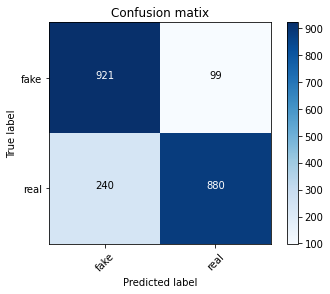

In [ ]:
pred_keyword_syn_embed=clf.predict(np.array(val_df_ky_syn))
print_metrices(pred_keyword_syn_embed,val_df['label'])
plot_confusion_matrix(confusion_matrix(val_df['label'],pred_keyword_syn_embed),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix')


## Checking with random deletion

In [ ]:
val_df.columns

Index(['id', 'tweet', 'label', 'clean_text', 'final_text', 'augmented',
       'deletion', 'keywords', 'keyword_synonyms'],
      dtype='object')

In [ ]:
val_df['deletion'] = val_df['final_text'].apply(lambda x : random_deletion(x,0.4)) 

In [ ]:
val_del_df_embed = embed(val_df['deletion'])

[[935  85]
 [240 880]]
              precision    recall  f1-score   support

        fake       0.80      0.92      0.85      1020
        real       0.91      0.79      0.84      1120

    accuracy                           0.85      2140
   macro avg       0.85      0.85      0.85      2140
weighted avg       0.86      0.85      0.85      2140

Accuracy :  0.8481308411214953
Precison :  0.8576157098353359
Recall :  0.8481308411214953
F1 :  0.8484137348967399


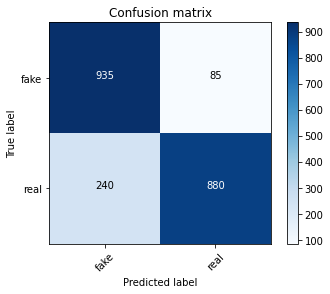

In [ ]:
pred_del_embed=clf.predict(np.array(val_del_df_embed))
print_metrices(pred_del_embed,val_df['label'])
plot_confusion_matrix(confusion_matrix(val_df['label'],pred_del_embed),target_names=['fake','real'], normalize = False)


### Random keyword deletion

In [ ]:
def keyword_deletion(val): 
  cleaned_words = list(val['final_text'])
  keywords = list(val['keywords'])
  new_list = []
  for item,words in enumerate(cleaned_words) :
      split_words = words.split() 
      new_words = split_words.copy() 
      keyword_list = keywords[item] 
      if(len(keyword_list) >  5 ):
          keyword_list = sample(keyword_list,5)
      else :
          keyword_list = []
      new_words = ["" if word in keyword_list else word for word in new_words]
      sentence = ' '.join(new_words)
      new_list.append(sentence) 
  return new_list

In [ ]:
new_keywords_list_embed = keyword_deletion(val_df)
val_df['keyword_deletion'] = ["".join(i) for i in new_keywords_list_embed ]

In [ ]:
val_keyword_del_embed = embed(val_df['keyword_deletion'])

[[902 118]
 [201 919]]
              precision    recall  f1-score   support

        fake       0.82      0.88      0.85      1020
        real       0.89      0.82      0.85      1120

    accuracy                           0.85      2140
   macro avg       0.85      0.85      0.85      2140
weighted avg       0.85      0.85      0.85      2140

Accuracy :  0.8509345794392523
Precison :  0.8534082125840989
Recall :  0.8509345794392523
F1 :  0.8508886486631134


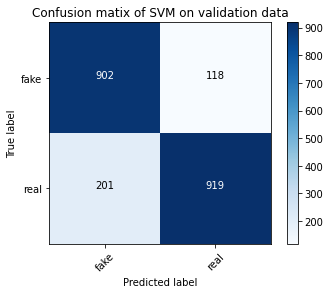

In [ ]:
pred_key_del_embed=clf.predict(np.array(val_keyword_del_embed))
print_metrices(pred_key_del_embed,val_df['label'])
plot_confusion_matrix(confusion_matrix(val_df['label'],pred_key_del_embed),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on validation data')


### Random swap

In [ ]:
val_df['swap'] = val_df['final_text'].apply(lambda x : random_swap(x,len(x))) 

In [ ]:
val_swap_embed = embed(val_df['swap'])

[[ 931   89]
 [ 101 1019]]
              precision    recall  f1-score   support

        fake       0.90      0.91      0.91      1020
        real       0.92      0.91      0.91      1120

    accuracy                           0.91      2140
   macro avg       0.91      0.91      0.91      2140
weighted avg       0.91      0.91      0.91      2140

Accuracy :  0.9112149532710281
Precison :  0.9112313476792585
Recall :  0.9112149532710281
F1 :  0.9111944458426783


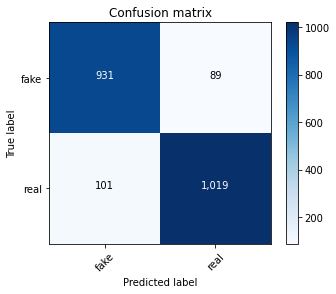

In [ ]:
pred_swap_embed=clf.predict(np.array(val_swap_embed))
print_metrices(pred_swap_embed,val_df['label'])
plot_confusion_matrix(confusion_matrix(val_df['label'],pred_swap_embed),target_names=['fake','real'], normalize = False)


## validating on CTF data

In [ ]:
ctf_embed = embed(ctf_data['final_text'])

[[353  33]
 [270 109]]
              precision    recall  f1-score   support

        fake       0.57      0.91      0.70       386
        real       0.77      0.29      0.42       379

    accuracy                           0.60       765
   macro avg       0.67      0.60      0.56       765
weighted avg       0.67      0.60      0.56       765

Accuracy :  0.6039215686274509
Precison :  0.7981403818311609
Recall :  0.6039215686274509
F1 :  0.6474918611947518


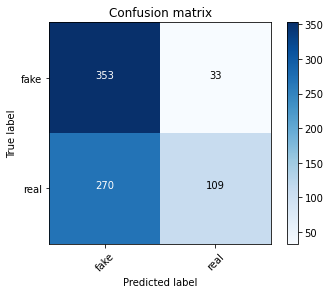

In [ ]:
pred_ctf_embed=clf.predict(np.array(ctf_embed))
print_metrices(pred_ctf_embed,ctf_data['label'])
plot_confusion_matrix(confusion_matrix(ctf_data['label'],pred_ctf_embed),target_names=['fake','real'], normalize = False)


#Data augmentation with synonym replacement

In [ ]:
from nltk.corpus import wordnet 

In [ ]:
def get_synonyms(word):
    """
    Get synonyms of a word
    """
    synonyms = set()
    
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonym = l.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym) 
    
    if word in synonyms:
        synonyms.remove(word)
    
    return list(synonyms)

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
get_synonyms("simple")

['wide eyed',
 'childlike',
 'unsubdivided',
 'unproblematic',
 'bare',
 'mere',
 'dewy eyed',
 'dim witted',
 'uncomplicated',
 'elementary',
 'round eyed',
 'simple minded',
 'simpleton']

In [ ]:
get_synonyms("important")

['crucial', 'authoritative', 'of import', 'significant']

In [ ]:
import random

In [ ]:
 list1 = range(1,6)
 print(random.choice(list1))

2


In [ ]:
def synonym_replacement(words):
    n = 7
    words = words.split()  
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in stops]))
    random.shuffle(random_word_list)
    num_replaced = 0
    
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        
        if len(synonyms) >= 1:
            synonym = random.choice(list(synonyms))
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        
        if num_replaced >= n: #only replace up to n words
            break

    sentence = ' '.join(new_words)

    return sentence

In [ ]:
synonym_replacement(train['cleaned'][0])

'center for disease control and prevention currently news report 99031 deaths oecumenical discrepancies death counts different sources humble explicable death toll stands roughly lakh people today'

In [ ]:
train['cleaned'][0]

'cdc currently reports 99031 deaths general discrepancies death counts different sources small explicable death toll stands roughly 100000 people today'

In [ ]:
len(val)

2140

In [ ]:
val['cleaned'][1]

'11 13 people diamond princess cruise ship intially tested negative tests japan later confirmed positive united states'

In [ ]:
val['augmented'][1]

'11 long dozen mass diamond princess cruise ship intially tested negative tests japan later confirmed positive merge states'

In [ ]:
val['augmented'] = val['cleaned'].apply(lambda x : synonym_replacement(x))

In [ ]:
val['augmented']

0       formosan win over islamism bring in moslem bea...
1       11 bakers dozen people baseball diamond prince...
2       covid xix do bacteria computer virus toughened...
3       microphone centime rnc speech praises donald t...
4       sixer decade pitch edconwaysky explain former ...
                              ...                        
2135    donald trump wrongly arrogate new seeland big ...
2136    flow understanding covid19 scatter largely per...
2137    null screams sat around sleep with lockdown qu...
2138    birx say covid nineteen eruption hold mass prompt
2139    another 4422 new coronavirus cases confirmed u...
Name: augmented, Length: 2140, dtype: object

[[935  85]
 [199 921]]
              precision    recall  f1-score   support

        fake       0.82      0.92      0.87      1020
        real       0.92      0.82      0.87      1120

    accuracy                           0.87      2140
   macro avg       0.87      0.87      0.87      2140
weighted avg       0.87      0.87      0.87      2140

Accuracy :  0.8672897196261682
Precison :  0.8723155874499332
Recall :  0.8672897196261682
F1 :  0.867335971410784


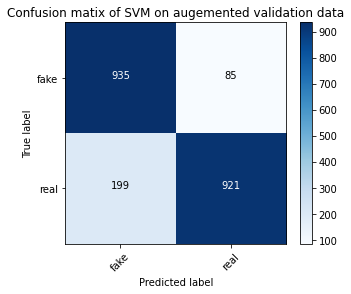

In [ ]:
pred_aug=pipeline.predict(val['augmented'])
print_metrices(pred_aug,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],pred_aug),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on augemented validation data')


In [ ]:
def random_insertion(words, n):
    
    words = words.split()
    new_words = words.copy()
    
    for _ in range(n):
        add_word(new_words)
        
    sentence = ' '.join(new_words)
    return sentence

def add_word(new_words):
    
    synonyms = []
    counter = 0
    
    while len(synonyms) < 1:
        random_word = new_words[random.randint(0, len(new_words)-1)]
        synonyms = get_synonyms(random_word)
        counter += 1
        if counter >= 10:
            return
        
    random_synonym = synonyms[0]
    random_idx = random.randint(0, len(new_words)-1)
    new_words.insert(random_idx, random_synonym)

In [ ]:
random_insertion(val['cleaned'][0],3)

'chinese converting islam formosan realising muslim affected involve coronavirus islamic covd19 country'

In [ ]:
val['cleaned'][0]

'chinese converting islam realising muslim affected coronavirus covd19 country'

In [ ]:
val['insertion'] = val['cleaned'].apply(lambda x : random_insertion(x,3)) 

[[ 952   68]
 [  87 1033]]
              precision    recall  f1-score   support

        fake       0.92      0.93      0.92      1020
        real       0.94      0.92      0.93      1120

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140

Accuracy :  0.927570093457944
Precison :  0.92766786270583
Recall :  0.927570093457944
F1 :  0.9275457180642138


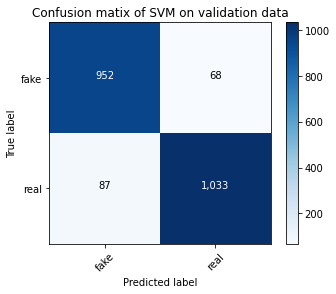

In [ ]:
pred_ins=pipeline.predict(val['insertion'])
print_metrices(pred_ins,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],pred_ins),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on validation data')


# Random deletion

In [ ]:
def random_deletion(words, p):

    words = words.split()
    
    #obviously, if there's only one word, don't delete it
    if len(words) == 1:
        return words

    #randomly delete words with probability p
    new_words = []
    for word in words:
        r = random.uniform(0, 1)
        if r > p:
            new_words.append(word)

    #if you end up deleting all words, just return a random word
    if len(new_words) == 0:
        rand_int = random.randint(0, len(words)-1)
        return words[rand_int]

    sentence = ' '.join(new_words)
    
    return sentence

In [ ]:
val['deletion'] = val['cleaned'].apply(lambda x : random_deletion(x,0.4)) 

In [ ]:
val['deletion']

0       chinese converting realising muslim affected c...
1       11 people diamond cruise intially tested negat...
2         covid 19 caused bacterium virus treated aspirin
3       mike pence praises donald trump covid 19 seaml...
4                           6 data government coronavirus
                              ...                        
2135    donald trump wrongly claimed new zealand surge...
2136    understanding covid19 spreads mostly person re...
2137    sat around fuck lockdown quite confident assum...
2138                  birx says covid control people move
2139    another coronavirus cases confirmed highest nu...
Name: deletion, Length: 2140, dtype: object

In [ ]:
val['deletion'][0]

'chinese converting islam realising affected'

In [ ]:
val['cleaned'][0]

'chinese converting islam realising muslim affected coronavirus covd19 country'

[[935  85]
 [147 973]]
              precision    recall  f1-score   support

        fake       0.86      0.92      0.89      1020
        real       0.92      0.87      0.89      1120

    accuracy                           0.89      2140
   macro avg       0.89      0.89      0.89      2140
weighted avg       0.89      0.89      0.89      2140

Accuracy :  0.891588785046729
Precison :  0.8929770249221184
Recall :  0.891588785046729
F1 :  0.8915329947192632


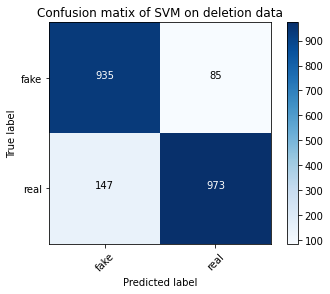

In [ ]:
pred_del=pipeline.predict(val['deletion'])
print_metrices(pred_del,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],pred_del),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on deletion data')


#Synonym replacement only for keywords

In [ ]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 1
deduplication_threshold = 0.7
numOfKeywords = 10

In [ ]:
text2 ="bollywood actor aamir kahan has anonymously donated Rs 15000 to people living in a slum."

In [ ]:
val['keywords'] = val['cleaned'].apply(lambda x : keyword_extractor(x))

In [ ]:
val.columns

Index(['id', 'tweet', 'label', 'cleaned', 'augmented', 'insertion', 'deletion',
       'keywords'],
      dtype='object')

In [ ]:
from random import sample

In [ ]:
def synonym_replacement(val): 
  cleaned_words = list(val['cleaned'])
  keywords = list(val['keywords'])
  new_list = []
  for item,words in enumerate(cleaned_words) :
      split_words = words.split() 
      new_words = split_words.copy() 
      keyword_list = keywords[item]
      synonyms = []
      for keyword in keyword_list :
       synonym_list = get_synonyms(keyword)
       if len(synonym_list) > 0 :
          synonyms.append(synonym_list)  
       else :
           synonyms.append(list(keyword.split(" ")))    
      dict1 = {}
      for i,val in enumerate(keyword_list):
        dict1[val] = synonyms[i]  
      #new_words = [sample(dict1[word],1)[0] if word in keyword_list else (word if word in ["covid19","covid","coronavirus"] else "noun") for word in new_words]
      new_words = [sample(dict1[word],1)[0] if word in keyword_list else word for word in new_words]
      sentence = ' '.join(new_words)
      new_list.append(sentence) 
  return new_list

In [ ]:
keyword_synonyms = synonym_replacement(val)

In [ ]:
val['keyword_synonyms'] = ["".join(i) for i in keyword_synonyms ]

In [ ]:
val['keyword_synonyms'][0]

'formosan exchange islamism actualize moslem strike coronavirus covd19 state'

In [ ]:
val['cleaned'][0]

'chinese converting islam realising muslim affected coronavirus covd19 country'

In [ ]:
val['keywords'][0]

['country',
 'chinese',
 'coronavirus',
 'converting',
 'islam',
 'realising',
 'muslim',
 'affected']

In [ ]:
val['keyword_synonyms'][10]

'noun fly sheet favorable sky noun fright covid airway outride noun rubber coronavirus'

In [ ]:
val['cleaned'][10]

'still fly friendly skies without fear covid airlines stay serious safety coronavirus'

In [ ]:
val['keywords'][10]

['coronavirus',
 'fly',
 'friendly',
 'skies',
 'fear',
 'covid',
 'airlines',
 'stay',
 'safety']

In [ ]:
l1 = ['a']
print(str(l1))

['a']


In [ ]:
get_synonyms("Amir Khan")

[]

[[966  54]
 [246 874]]
              precision    recall  f1-score   support

        fake       0.80      0.95      0.87      1020
        real       0.94      0.78      0.85      1120

    accuracy                           0.86      2140
   macro avg       0.87      0.86      0.86      2140
weighted avg       0.87      0.86      0.86      2140

Accuracy :  0.8598130841121495
Precison :  0.8747694965836802
Recall :  0.8598130841121495
F1 :  0.8603548010250226


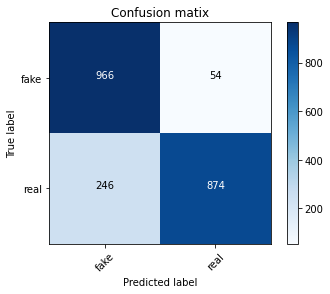

In [ ]:
pred_keyword=pipeline.predict(val['keyword_synonyms'])
print_metrices(pred_keyword,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],pred_keyword),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix')


In [ ]:
pred_keyword

array(['fake', 'real', 'fake', ..., 'fake', 'fake', 'real'], dtype=object)

In [ ]:
val['label']

0       fake
1       fake
2       fake
3       fake
4       real
        ... 
2135    fake
2136    real
2137    fake
2138    fake
2139    real
Name: label, Length: 2140, dtype: object

# Random key word deletion

In [ ]:
def keyword_deletion(val): 
  cleaned_words = list(val['cleaned'])
  keywords = list(val['keywords'])
  new_list = []
  for item,words in enumerate(cleaned_words) :
      split_words = words.split() 
      new_words = split_words.copy() 
      keyword_list = keywords[item] 
      if(len(keyword_list) >  5 ):
          keyword_list = sample(keyword_list,5)
      else :
          keyword_list = []
      new_words = ["" if word in keyword_list else word for word in new_words]
      sentence = ' '.join(new_words)
      new_list.append(sentence) 
  return new_list

In [ ]:
new_keywords_list = keyword_deletion(val)
val['keyword_deletion'] = ["".join(i) for i in new_keywords_list ]

In [ ]:
val['keyword_deletion'][0]

'  islam  muslim affected  covd19 '

[[934  86]
 [135 985]]
              precision    recall  f1-score   support

        fake       0.87      0.92      0.89      1020
        real       0.92      0.88      0.90      1120

    accuracy                           0.90      2140
   macro avg       0.90      0.90      0.90      2140
weighted avg       0.90      0.90      0.90      2140

Accuracy :  0.8967289719626168
Precison :  0.8975583539490564
Recall :  0.8967289719626168
F1 :  0.8966725869166369


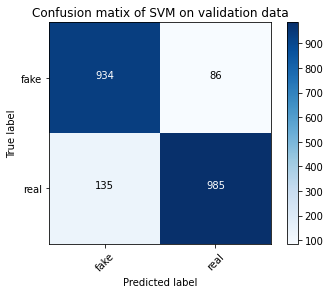

In [ ]:
pred_kd=pipeline.predict(val['keyword_deletion'])
print_metrices(pred_kd,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],pred_kd),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on validation data')


# Random Swap

In [ ]:
def swap_word(new_words):
    
    random_idx_1 = random.randint(0, len(new_words)-1)
    random_idx_2 = random_idx_1
    counter = 0
    
    while random_idx_2 == random_idx_1:
        random_idx_2 = random.randint(0, len(new_words)-1)
        counter += 1
        
        if counter > 3:
            return new_words
    
    new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1] 
    return new_words

def random_swap(words, n):
    
    words = words.split()
    new_words = words.copy()
    
    for _ in range(n):
        new_words = swap_word(new_words)
        
    sentence = ' '.join(new_words)
    
    return sentence

In [ ]:
val['swap'] = val['cleaned'].apply(lambda x : random_swap(x,len(x))) 

In [ ]:
val['swap'][0]

'covd19 islam affected chinese muslim converting realising coronavirus country'

In [ ]:
val['cleaned'][0]

'chinese converting islam realising muslim affected coronavirus covd19 country'

[[ 963   57]
 [  83 1037]]
              precision    recall  f1-score   support

        fake       0.92      0.94      0.93      1020
        real       0.95      0.93      0.94      1120

    accuracy                           0.93      2140
   macro avg       0.93      0.94      0.93      2140
weighted avg       0.93      0.93      0.93      2140

Accuracy :  0.9345794392523364
Precison :  0.9348008619335585
Recall :  0.9345794392523364
F1 :  0.9345519215989282


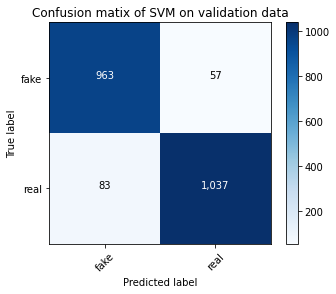

In [ ]:
pred_rs=pipeline.predict(val['swap'])
print_metrices(pred_rs,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],pred_rs),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on validation data')
